In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_geran_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

Splitting dependent and independent variables

In [4]:
X = df_rf.drop(['index', 'X..Geraniol'], axis = 1)
y = df_rf[['X..Geraniol']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

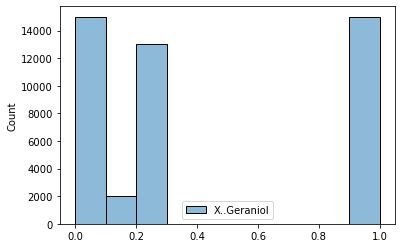

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_9787/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [10]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03170916372709689

In [12]:
mean_squared_error(y_val, y_pred_rfreg)

0.010083969597479661

In [13]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.10041897030680837

In [14]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9835650389433528

In [15]:
#val
r2_score(y_val, y_pred_rfreg)

0.9455048223135305

Residual plots for each target variable

Feature Selection

In [16]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [17]:
df_feat

,features,score
0,tfidf_0,0.000327
1,tfidf_1,0.001356
2,tfidf_2,0.000696
3,tfidf_3,0.000123
4,tfidf_4,0.001062
...,...,...
464,tree,0.000587
465,tropical,0.000536
466,vanilla,0.001937
467,violet,0.000010


In [18]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [19]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
388,hybrid,1.670229e-01
345,tfidf_345,2.635097e-02
433,diesel,2.551401e-02
329,tfidf_329,2.517208e-02
342,tfidf_342,1.673504e-02
447,orange,1.371383e-02
149,tfidf_149,1.361106e-02
441,lemon,1.349075e-02
168,tfidf_168,1.313941e-02
78,tfidf_78,1.193064e-02


In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [21]:
selector.estimator_.feature_importances_

array([2.67241452e-04, 2.09757252e-03, 7.29099103e-04, 1.56732390e-04,
       1.34048374e-03, 2.90623193e-03, 6.82454889e-04, 5.04439149e-03,
       2.22043871e-04, 1.73537313e-03, 6.52800272e-04, 3.23335662e-03,
       1.23266165e-03, 7.25915399e-04, 4.37485707e-04, 1.78393344e-04,
       2.11641008e-03, 1.22610103e-03, 1.19958134e-05, 9.07360365e-04,
       2.46578300e-03, 1.59947263e-03, 1.22235009e-03, 8.53637618e-04,
       7.44793869e-04, 2.40141557e-04, 1.75106148e-03, 1.13403896e-04,
       4.80401975e-04, 3.20997506e-04, 4.71130816e-03, 1.35112918e-03,
       1.43555691e-03, 2.25561241e-04, 1.20101203e-03, 9.78278214e-05,
       1.90546625e-04, 7.80486688e-03, 8.61210264e-04, 7.16023741e-04,
       4.63562347e-04, 7.21027953e-04, 1.57253453e-04, 4.12066208e-03,
       2.11488986e-03, 1.09591966e-03, 3.13174996e-03, 1.39115587e-03,
       8.85552013e-04, 5.20151220e-04, 2.18748281e-04, 7.63412158e-04,
       2.21151673e-04, 1.21543198e-03, 1.56983652e-03, 4.36478885e-05,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_11,tfidf_20,tfidf_30,tfidf_37,tfidf_43,tfidf_46,tfidf_64,tfidf_69,...,uplifted,cheese,citrus,diesel,earthy,lemon,orange,pungent,skunk,sweet
0,0.145484,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1,1,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.165804,0.0,0.000000,0.0,0.0,0.0,0.191769,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,1,1
3,0.000000,0.0,0.298306,0.0,0.149052,0.0,0.0,0.0,0.000000,0.0,...,1,1,0,0,0,0,0,1,0,1
4,0.107335,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
44996,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.244511,0.0,...,0,0,0,0,0,0,0,0,0,0
44997,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
44998,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [27]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_geran.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_geran.pkl")

['selected_X_rf_tfidf_geran.pkl']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [29]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [30]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_9787/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [31]:
mean_absolute_error(y_val, y_pred_rfreg)

0.030639508396076664

In [32]:
mean_squared_error(y_val, y_pred_rfreg)

0.009977757025161694

In [33]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09988872321319206

In [34]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9775552102467789

In [35]:
#val
r2_score(y_val, y_pred_rfreg)

0.9460105134764426

Hyperparameter Tuning

In [36]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [37]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [38]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [40]:
joblib.dump(rscv, "rscv_rf_tfidf_geran.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_geran.pkl")

['rscv_rf_tfidf_best_params_geran.pkl']

RF (after Hyperparameter Tuning)

In [41]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_9787/1649723548.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [42]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02851837880797825

In [43]:
mean_squared_error(y_val, y_pred_rfreg)

0.007195409465395055

In [44]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08482575944484703

In [45]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.979895059230997

In [46]:
#val
r2_score(y_val, y_pred_rfreg)

0.9610657524147189

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [47]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [48]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_geran.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_geran.pkl")

['y_test_rfreg_tfidf_geran.pkl']

In [49]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.02987062752544957

In [50]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.007770204827766654

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.0881487653218504

In [52]:
r2_score(y_test, y_pred_rfreg_test)

0.9577824878083815

Error analysis

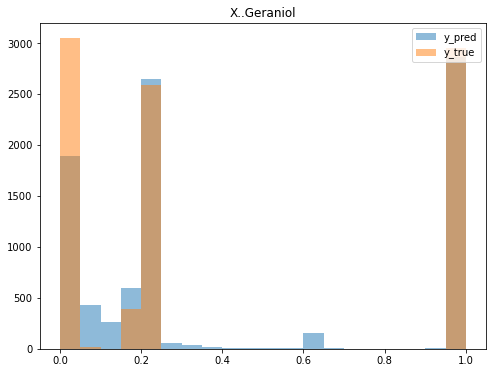

<Figure size 432x288 with 0 Axes>

In [53]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Geraniol"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_geran.png')

Pearson R

In [54]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.980
P-value: 0.000


<AxesSubplot:>

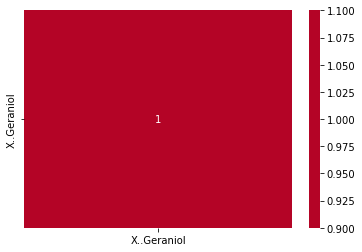

In [55]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)